# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [50]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'graphviz'

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

pandas     : 1.4.4
numpy      : 1.21.5
matplotlib : 3.5.2
patsy      : 0.5.2
seaborn    : 0.11.2
statsmodels: 0.13.2



In [5]:
# Carregando dataset
df = pd.read_csv('previsao_de_renda.csv')

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [7]:
# Amostra de dados
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [8]:
# 1)
X = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)

In [9]:
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [10]:
#2)

reg = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_train)

In [12]:
# Alpha = 0
modelo_a = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0)

modelo_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:07:46   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.041e+04
Df Residuals:                    9302   BIC:                         2.059e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5703      0.227     28.927      0.000       6.125       7.015
C(sexo)[T.M]                                          0.7884      0.017     46.572      0.000       0.755       0.822
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.380      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0818      0.016      5.060      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1484      0.017      8.600      0.000       0.115       0.182
C(tipo_renda)[T.Pensionista]                         -0.2467      0.256     -0.964      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0737      0.026      2.883      0.004       0.024       0.124
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.453      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1627      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0998      0.016      6.222      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0383      0.037     -1.042      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3160      0.116      2.724      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2495      0.113      2.203      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0395      0.029     -1.358      0.175      -0.097       0.018
C(estado_civil)[T.Viúvo]                              0.3940      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0561      0.062      0.899      0.369      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0277      0.034      0.817      0.414      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1123      0.108     -1.036      0.300      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.0203      0.100     -0.203      0.839      -0.216       0.175
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0116      0.045     -0.254      0.800      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.318      0.000       0.002       0.006
tempo_emprego  

In [13]:
# Alpha = 0.001
modelo_b = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0.001)

modelo_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:08:15   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.041e+04
Df Residuals:                    9302   BIC:                         2.059e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5703      0.227     28.927      0.000       6.125       7.015
C(sexo)[T.M]                                          0.7884      0.017     46.572      0.000       0.755       0.822
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.380      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0818      0.016      5.060      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1484      0.017      8.600      0.000       0.115       0.182
C(tipo_renda)[T.Pensionista]                         -0.2467      0.256     -0.964      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0737      0.026      2.883      0.004       0.024       0.124
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.453      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1627      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0998      0.016      6.222      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0383      0.037     -1.042      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3160      0.116      2.724      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2495      0.113      2.203      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0395      0.029     -1.358      0.175      -0.097       0.018
C(estado_civil)[T.Viúvo]                              0.3940      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0561      0.062      0.899      0.369      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0277      0.034      0.817      0.414      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1123      0.108     -1.036      0.300      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.0203      0.100     -0.203      0.839      -0.216       0.175
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0116      0.045     -0.254      0.800      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.318      0.000       0.002       0.006
tempo_emprego  

In [14]:
# Alpha = 0.005
modelo_c = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0.005)

modelo_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:09:07   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.041e+04
Df Residuals:                    9302   BIC:                         2.059e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5703      0.227     28.927      0.000       6.125       7.015
C(sexo)[T.M]                                          0.7884      0.017     46.572      0.000       0.755       0.822
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.380      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0818      0.016      5.060      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1484      0.017      8.600      0.000       0.115       0.182
C(tipo_renda)[T.Pensionista]                         -0.2467      0.256     -0.964      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0737      0.026      2.883      0.004       0.024       0.124
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.453      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1627      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0998      0.016      6.222      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0383      0.037     -1.042      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3160      0.116      2.724      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2495      0.113      2.203      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0395      0.029     -1.358      0.175      -0.097       0.018
C(estado_civil)[T.Viúvo]                              0.3940      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0561      0.062      0.899      0.369      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0277      0.034      0.817      0.414      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1123      0.108     -1.036      0.300      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.0203      0.100     -0.203      0.839      -0.216       0.175
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0116      0.045     -0.254      0.800      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.318      0.000       0.002       0.006
tempo_emprego  

In [15]:
# Alpha = 0.01
modelo_d = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0.01)

modelo_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:09:39   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.041e+04
Df Residuals:                    9302   BIC:                         2.059e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5703      0.227     28.927      0.000       6.125       7.015
C(sexo)[T.M]                                          0.7884      0.017     46.572      0.000       0.755       0.822
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.380      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0818      0.016      5.060      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1484      0.017      8.600      0.000       0.115       0.182
C(tipo_renda)[T.Pensionista]                         -0.2467      0.256     -0.964      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0737      0.026      2.883      0.004       0.024       0.124
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.453      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1627      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0998      0.016      6.222      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0383      0.037     -1.042      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3160      0.116      2.724      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2495      0.113      2.203      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0395      0.029     -1.358      0.175      -0.097       0.018
C(estado_civil)[T.Viúvo]                              0.3940      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0561      0.062      0.899      0.369      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0277      0.034      0.817      0.414      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1123      0.108     -1.036      0.300      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.0203      0.100     -0.203      0.839      -0.216       0.175
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0116      0.045     -0.254      0.800      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.318      0.000       0.002       0.006
tempo_emprego  

In [16]:
# Alpha = 0.05
modelo_e = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0.05)

modelo_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:12:32   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.041e+04
Df Residuals:                    9302   BIC:                         2.059e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5703      0.227     28.927      0.000       6.125       7.015
C(sexo)[T.M]                                          0.7884      0.017     46.572      0.000       0.755       0.822
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.380      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0818      0.016      5.060      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1484      0.017      8.600      0.000       0.115       0.182
C(tipo_renda)[T.Pensionista]                         -0.2467      0.256     -0.964      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0737      0.026      2.883      0.004       0.024       0.124
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.453      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1627      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0998      0.016      6.222      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0383      0.037     -1.042      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3160      0.116      2.724      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2495      0.113      2.203      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0395      0.029     -1.358      0.175      -0.097       0.018
C(estado_civil)[T.Viúvo]                              0.3940      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0561      0.062      0.899      0.369      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0277      0.034      0.817      0.414      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1123      0.108     -1.036      0.300      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.0203      0.100     -0.203      0.839      -0.216       0.175
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0116      0.045     -0.254      0.800      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.318      0.000       0.002       0.006
tempo_emprego  

In [17]:
# Alpha = 0.1
modelo_f = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0.1)

modelo_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:12:51   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.040e+04
Df Residuals:                    9303   BIC:                         2.058e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5705      0.227     28.930      0.000       6.125       7.016
C(sexo)[T.M]                                          0.7882      0.017     46.628      0.000       0.755       0.821
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.378      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0819      0.016      5.064      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1483      0.017      8.598      0.000       0.114       0.182
C(tipo_renda)[T.Pensionista]                         -0.2466      0.256     -0.963      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0734      0.026      2.877      0.004       0.023       0.123
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.454      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1628      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0997      0.016      6.220      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0382      0.037     -1.041      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3159      0.116      2.723      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2494      0.113      2.202      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0396      0.029     -1.360      0.174      -0.097       0.017
C(estado_civil)[T.Viúvo]                              0.3939      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0562      0.062      0.901      0.367      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0278      0.034      0.821      0.411      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1122      0.108     -1.035      0.301      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0114      0.045     -0.251      0.802      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.317      0.000       0.002       0.006
tempo_emprego  

In [18]:
X_test['log_renda']=np.log(X_test['renda'])

In [19]:
# Calculo R² na base testes
X_test['pred_a'] = modelo_a.predict(X_test)
r = X_test[['pred_a', 'log_renda']].corr().iloc[0,1]
r**2

0.3535210001200494

In [20]:
X_test['pred_b'] = modelo_b.predict(X_test)
r = X_test[['pred_b', 'log_renda']].corr().iloc[0,1]
r**2

0.3535210001200494

In [21]:
X_test['pred_f'] = modelo_f.predict(X_test)
r = X_test[['pred_f', 'log_renda']].corr().iloc[0,1]
r**2

0.35367519171921274

- Não há variações significativamente em o R².
- No modelo com alpha = 0.1 observamos uma pequena diminuição no AIC e um pequeno aumento do R² na base de testes. Considero que esse seja melhor modelo.

In [22]:
# 3. Modelagem com L1_wt = 1
# Alpha = 0
modelo_g = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

modelo_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:25:57   Log-Likelihood:                -10177.
No. Observations:                9327   AIC:                         2.041e+04
Df Residuals:                    9302   BIC:                         2.059e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5703      0.227     28.927      0.000       6.125       7.015
C(sexo)[T.M]                                          0.7884      0.017     46.572      0.000       0.755       0.822
C(posse_de_veiculo)[T.True]                           0.0388      0.016      2.380      0.017       0.007       0.071
C(posse_de_imovel)[T.True]                            0.0818      0.016      5.060      0.000       0.050       0.114
C(tipo_renda)[T.Bolsista]                             0.1987      0.295      0.673      0.501      -0.380       0.777
C(tipo_renda)[T.Empresário]                           0.1484      0.017      8.600      0.000       0.115       0.182
C(tipo_renda)[T.Pensionista]                         -0.2467      0.256     -0.964      0.335      -0.748       0.255
C(tipo_renda)[T.Servidor público]                     0.0737      0.026      2.883      0.004       0.024       0.124
C(educacao, Treatment(2))[T.Primário]                 0.0373      0.082      0.453      0.650      -0.124       0.199
C(educacao, Treatment(2))[T.Pós graduação]            0.1627      0.166      0.979      0.328      -0.163       0.489
C(educacao, Treatment(2))[T.Superior completo]        0.0998      0.016      6.222      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0383      0.037     -1.042      0.298      -0.110       0.034
C(estado_civil)[T.Separado]                           0.3160      0.116      2.724      0.006       0.089       0.543
C(estado_civil)[T.Solteiro]                           0.2495      0.113      2.203      0.028       0.027       0.471
C(estado_civil)[T.União]                             -0.0395      0.029     -1.358      0.175      -0.097       0.018
C(estado_civil)[T.Viúvo]                              0.3940      0.122      3.235      0.001       0.155       0.633
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0561      0.062      0.899      0.369      -0.066       0.178
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0277      0.034      0.817      0.414      -0.039       0.094
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.1123      0.108     -1.036      0.300      -0.325       0.100
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.0203      0.100     -0.203      0.839      -0.216       0.175
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0116      0.045     -0.254      0.800      -0.101       0.078
qtd_filhos                                           -0.2723      0.112     -2.437      0.015      -0.491      -0.053
idade                                                 0.0040      0.001      4.318      0.000       0.002       0.006
tempo_emprego  

In [23]:
# Alpha = 0.001
modelo_h = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)

modelo_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     365.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:26:15   Log-Likelihood:                -10203.
No. Observations:                9327   AIC:                         2.044e+04
Df Residuals:                    9313   BIC:                         2.054e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.6727      0.227     29.392      0.000       6.228       7.118
C(sexo)[T.M]                                          0.7983      0.016     49.807      0.000       0.767       0.830
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                            0.0845      0.016      5.318      0.000       0.053       0.116
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1588      0.017      9.247      0.000       0.125       0.192
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                     0.0892      0.025      3.508      0.000       0.039       0.139
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0814      0.036     -2.253      0.024      -0.152      -0.011
C(estado_civil)[T.Separado]                           0.3049      0.116      2.624      0.009       0.077       0.533
C(estado_civil)[T.Solteiro]                           0.2377      0.113      2.095      0.036       0.015       0.460
C(estado_civil)[T.União]                             -0.0481      0.029     -1.652      0.099      -0.105       0.009
C(estado_civil)[T.Viúvo]                              0.3784      0.122      3.102      0.002       0.139       0.618
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                           -0.2624      0.112     -2.345      0.019      -0.482      -0.043
idade                                                 0.0032      0.001      3.456      0.001       0.001       0.005
tempo_emprego  

In [24]:
# Alpha = 0.005
modelo_i = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)

modelo_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     552.8
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:26:33   Log-Likelihood:                -10250.
No. Observations:                9327   AIC:                         2.052e+04
Df Residuals:                    9318   BIC:                         2.059e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3266      0.067    109.401      0.000       7.195       7.458
C(sexo)[T.M]                                          0.7722      0.017     45.705      0.000       0.739       0.805
C(posse_de_veiculo)[T.True]                           0.0508      0.016      3.116      0.002       0.019       0.083
C(posse_de_imovel)[T.True]                            0.0867      0.016      5.434      0.000       0.055       0.118
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                          -0.0612      0.034     -1.824      0.068      -0.127       0.005
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                            0.0485      0.029      1.679      0.093      -0.008       0.105
idade                                                 0.0035      0.001      3.905      0.000       0.002       0.005
tempo_emprego  

In [25]:
# Alpha = 0.01
modelo_j = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

modelo_j.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     982.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:26:48   Log-Likelihood:                -10271.
No. Observations:                9327   AIC:                         2.055e+04
Df Residuals:                    9322   BIC:                         2.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2829      0.044    164.817      0.000       7.196       7.370
C(sexo)[T.M]                                          0.7827      0.016     49.054      0.000       0.751       0.814
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0041      0.001      4.625      0.000       0.002       0.006
tempo_emprego  

In [26]:
# Alpha = 0.05
modelo_k = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)

modelo_k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1225.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:27:09   Log-Likelihood:                -10275.
No. Observations:                9327   AIC:                         2.056e+04
Df Residuals:                    9323   BIC:                         2.060e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3593      0.035    209.253      0.000       7.290       7.428
C(sexo)[T.M]                                          0.7866      0.016     49.446      0.000       0.755       0.818
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0035      0.001      4.069      0.000       0.002       0.005
tempo_emprego  

In [27]:
# Alpha = 0.1
modelo_l = smf.ols(reg, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)

modelo_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1225.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:27:29   Log-Likelihood:                -10275.
No. Observations:                9327   AIC:                         2.056e+04
Df Residuals:                    9323   BIC:                         2.060e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3593      0.035    209.253      0.000       7.290       7.428
C(sexo)[T.M]                                          0.7866      0.016     49.446      0.000       0.755       0.818
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0035      0.001      4.069      0.000       0.002       0.005
tempo_emprego  

In [28]:
# Calcular os R² para base teste
# Alpha = 0

X_test['pred_g'] = modelo_g.predict(X_test)
r = X_test[['pred_g', 'log_renda']].corr().iloc[0,1]
r**2

0.3535210001200494

In [29]:
# Alpha = 0.001
X_test['pred_h'] = modelo_h.predict(X_test)
r = X_test[['pred_h', 'log_renda']].corr().iloc[0,1]
r**2

0.34817678717771533

In [30]:
# Alpha = 0.005

X_test['pred_i'] = modelo_i.predict(X_test)
r = X_test[['pred_i', 'log_renda']].corr().iloc[0,1]
r**2

0.34174743940385394

In [31]:
# Alpha = 0.01
X_test['pred_j'] = modelo_j.predict(X_test)
r = X_test[['pred_j', 'log_renda']].corr().iloc[0,1]
r**2

0.3379270169756125

In [32]:
# Alpha = 0.05
X_test['pred_k'] = modelo_k.predict(X_test)
r = X_test[['pred_k', 'log_renda']].corr().iloc[0,1]
r**2

0.33804849943196186

In [33]:
# Alpha = 0.1
X_test['pred_l'] = modelo_l.predict(X_test)
r = X_test[['pred_l', 'log_renda']].corr().iloc[0,1]
r**2

0.33804849943196186

- Ao aumentar o valor de alpha, o AIC também aumenta e R² é reduzido na base treino e de base teste. 
- O modelo fica mais simples com  menos variávies. 
- O modelo que possui estatisticamente mais relevantes e com menor alpha é o de 0.01

In [34]:
# 4)
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [35]:
X_train_a = X_train.dropna()

In [36]:
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
1614,0,34,1.797260,2.0,3160.87,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
9327,1,34,9.101370,3.0,6480.13,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
11914,1,37,1.753425,3.0,5847.17,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
14579,1,44,7.473973,3.0,10415.23,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10292,1,34,16.583562,3.0,10300.75,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
X_train_c = X_train_b.drop(['renda'], axis=1)
y_train_a = X_train_b['renda']

In [38]:
X_stepwise = X_train.drop('renda', axis = 1)
X_stepwise = pd.get_dummies(X_stepwise, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'],drop_first=True)


y_stepwise = np.array(X_train[['renda']])

In [19]:
result = stepwise_selection(X = X_train_c,y = y_train_a)

print('resulting features:')
print(result)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_M                         with p-value 7.7764e-261
#############
['tempo_emprego', 'sexo_M']
Add  tipo_renda_Empresário          with p-value 0.000169345
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário']
Add  idade                          with p-value 0.000475965
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade']
Add  educacao_Superior completo     with p-value 0.000184571
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo']
Add  qt_pessoas_residencia          with p-value 0.0124444
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo', 'qt_pessoas_residencia']
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo', 'qt_pessoas_residencia']
resulting features:
['tempo_emprego', 'sexo_M', 'tipo_renda

- Para rodar o código passado em aula foi necessário tratar um pouco os dados, criar dummies e excluir dados faltantes. O melhor modelo contém as seguintes variáveis: `tempo_emprego`, `sexo_M`, `tipo_renda_Empresário`, `idade`, `educacao_Superior completo` e `qt_pessoas_residencia´.

In [39]:
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)

In [40]:
# Rodando regressão com as variáveis selecionadas
modelo_m = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + tipo_renda_Empresário + idade + educacao_Superior_completo + qt_pessoas_residencia', data = X_train_b).fit()
modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     850.1
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:33:59   Log-Likelihood:                -10209.
No. Observations:                9327   AIC:                         2.043e+04
Df Residuals:                    9320   BIC:                         2.048e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1511      0.045    157.244      0.000       7.062       7.240
tempo_emprego                  0.0628      0.001     52.346      0.000       0.060       0.065
sexo_M                         0.7922      0.016     49.900      0.000       0.761       0.823
tipo_renda_Empresário          0.1369      0.017      8.131      0.000       0.104       0.170
idade                          0.0049      0.001      5.551      0.000       0.003       0.007
educacao_Superior_completo     0.1107      0.016      7.122      0.000       0.080       0.141
qt_pessoas_residencia          0.0279      0.008      3.389      0.001       0.012       0.044
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.018
Skew:                           0.001   Prob(JB):                        0.991
Kurtosis:                       2.994   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_test_a = X_test.dropna()
X_test_b = pd.get_dummies(X_test_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_test_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)
X_test_b['log_renda']=np.log(X_test_b['renda'])

In [42]:
# R² na base teste
X_test_b['pred_m'] = modelo_m.predict(X_test_b)
r = X_test_b[['pred_m', 'log_renda']].corr().iloc[0,1]
r**2

0.35129792346813465

###  5) Resumo

Regressão Ridge:  
Quantidade de variáveis explicativas: 23  
R²: 0.358  
R² - Ajustado: 0.357  
R² - Base Teste: 0.354  
AIC: 2.040e+04  

Regressão LASSO: Quantidade de variáveis explicativas: 4  
R²: 0.345  
R² - Ajustado: 0.345  
R² - Base Teste: 0.338  
AIC: 2.055e+04  

Regressão Stepwise: Quantidade de variáveis explicativas: 6  
R²: 0.354  
R² - Ajustado: 0.353  
R² - Base Teste: 0.351  
AIC: 2.043e+04  

## Análise

- O modelo da Regressão de Ridge apresenta muitas variáveis explicativas.
- No modelo Stepwise os indicadores apresentam uma leve melhora do que a LASSO.
- O modelo Lasso apresenta performace próxima do Stepwise porém ele é um modelo mais simples, então eu considero o modelo LASSO a melhor opção.

In [43]:
# 6) Trabalhando com a melhor regressão
modelo_n = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_n.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000013C38A9FDF0>>

In [25]:
modelo_lasso = sm.OLS(Xnew, ynew).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
modelo_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:48:12   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.3217      0.031    239.950      0.000       7.262       7.382
sexo[T.M]                            0.7868      0.014     57.013      0.000       0.760       0.814
posse_de_veiculo[T.True]                  0          0        nan        nan           0           0
tipo_renda[T.Bolsista]                    0          0        nan        nan           0           0
tipo_renda[T.Empresário]                  0          0        nan        nan           0           0
tipo_renda[T.Pensionista]                 0          0        nan        nan           0           0
tipo_renda[T.Servidor público]            0          0        nan        nan           0           0
tipo_residencia[T.Casa]                   0          0        nan        nan           0           0
tipo_residencia[T.Com os pais]            0          0        nan        nan           0           0
tipo_residencia[T.Comunitário]            0          0        nan        nan           0           0
tipo_residencia[T.Estúdio]                0          0        nan        nan           0           0
tipo_residencia[T.Governamental]          0          0        nan        nan           0           0
idade                                0.0046      0.001      6.253      0.000       0.003       0.006
tempo_emprego                        0.0609      0.001     58.869      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.826
Skew:                           0.019   Prob(JB):                        0.662
Kurtosis:                       3.009   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Inserindo polinômios de segunda grau na variável explicativa 'tempo_emprego' e analisando o R²
modelo_o = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     996.7
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:45:29   Log-Likelihood:                -10248.
No. Observations:                9327   AIC:                         2.051e+04
Df Residuals:                    9321   BIC:                         2.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2092      0.045    158.925      0.000       7.120       7.298
tempo_emprego             0.0810      0.003     27.017      0.000       0.075       0.087
I(tempo_emprego ** 2)    -0.0007      0.000     -6.876      0.000      -0.001      -0.001
sexo_M                    0.7827      0.016     49.171      0.000       0.751       0.814
idade                     0.0043      0.001      4.938      0.000       0.003       0.006
qt_pessoas_residencia     0.0199      0.008      2.408      0.016       0.004       0.036
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.429
Skew:                           0.012   Prob(JB):                        0.807
Kurtosis:                       2.976   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Foi possível melhorar o R² adicionando um termo quadrático.

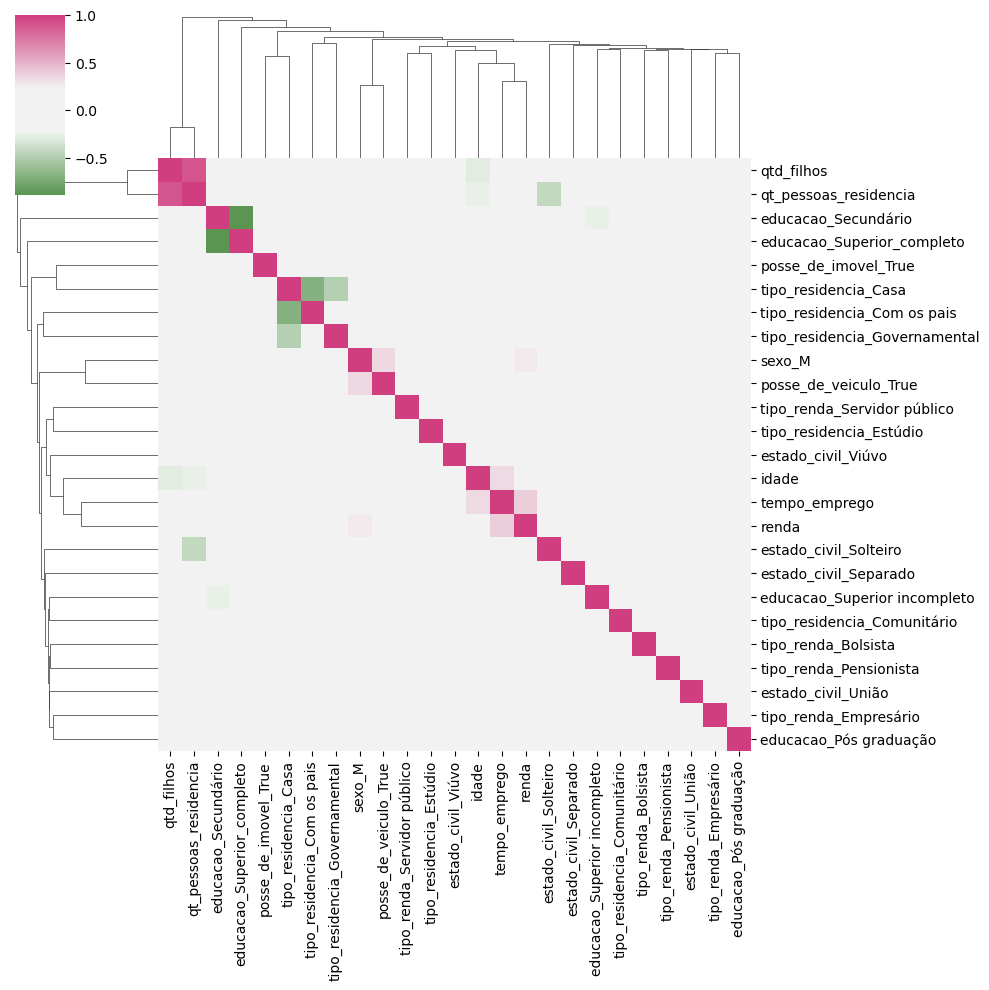

In [45]:
# 7)
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X_train_b.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [46]:
regr_a = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
regr_a.fit(X_train_c, y_train_a)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)

In [49]:
dot_data = tree.export_graphviz(regr_a, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

NameError: name 'graphviz' is not defined

- Poder ser interessante remover a variável qt_pessoas_residencia do modelo, sem que ocorra muitas perdas

In [51]:
# Modelo sem a variável 'qt_pessoas_residencia'
modelo_p = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade', data = X_train_b).fit()
modelo_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:03:08   Log-Likelihood:                -10251.
No. Observations:                9327   AIC:                         2.051e+04
Df Residuals:                    9322   BIC:                         2.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2717      0.037    195.396      0.000       7.199       7.345
tempo_emprego             0.0815      0.003     27.234      0.000       0.076       0.087
I(tempo_emprego ** 2)    -0.0007      0.000     -7.045      0.000      -0.001      -0.001
sexo_M                    0.7859      0.016     49.531      0.000       0.755       0.817
idade                     0.0038      0.001      4.503      0.000       0.002       0.006
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.523
Skew:                           0.013   Prob(JB):                        0.770
Kurtosis:                       2.973   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusão 

Não ocorre alteração significativa no modelo ao retirarmos a variável `qt_pessoas_residencia`. Temos então a versão final do modelo.